In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Lectura del dataset

In [2]:
ds = pd.read_csv('breast_cancer.csv')

In [3]:
ds.head(5)

,espesor_del_grupo,uniformidad_del_tamano_de_celda,uniformidad_de_forma_de_celda,adherencia_marginal,tamano_de_una_celula_epitelial,nucleos_desnudos,cromatina_blanda,nucleolos_normales,mitosis,clase
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


### Separación de variables de entrenamiento y prueba

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ds.drop('clase', axis=1), ds['clase'], test_size=0.3, random_state=101)

### Entrenando el modelo

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rfc = RandomForestClassifier(n_estimators=100,random_state=101,criterion='gini')

In [8]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

### Evaluación del modelo

In [9]:
rfc_pred = rfc.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       107
           1       0.94      0.97      0.95        64

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [12]:
print(confusion_matrix(y_test,rfc_pred))

[[103   4]
 [  2  62]]


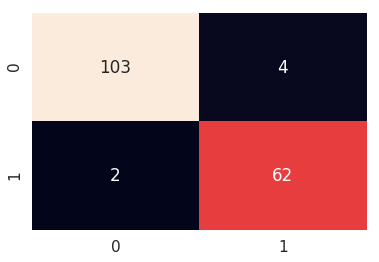

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
arregloMC = confusion_matrix(y_test,rfc_pred)
sns.set(font_scale=1.4)
sns.heatmap(arregloMC, annot=True, fmt='g', cbar=False)

$$ Exactitud = \frac{TP + TN}{\sum Población\;total}$$

In [15]:
print("La precisión es: {}%".format(((arregloMC[0][0] + arregloMC[1][1])/171)*100))

La precisión es: 96.49122807017544%
